<a href="https://colab.research.google.com/github/NanaShi929/GBS_Winter_School/blob/day-2/Python_Data_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: code to upload excel file

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# Now you can use pandas to read the excel file
import pandas as pd
df = pd.read_excel(fn) #Replace fn with the actual filename if it's different.
print(df.head())


Saving Data 3.xlsx to Data 3 (1).xlsx
User uploaded file "Data 3 (1).xlsx" with length 29325 bytes
      Year     M1  Tbill    CPI       IP
0  1960-01  140.0   4.35  29.37  24.1414
1  1960-02  139.9   3.96  29.41  23.9266
2  1960-03  139.8   3.31  29.41  23.7118
3  1960-04  139.6   3.23  29.54  23.5238
4  1960-05  139.6   3.29  29.57  23.4970


In [4]:
# prompt: code to create excel file of summary statistics with mean,medium,mode,std devivation ,JB stat,JB P-value,skwiness,kurtosis,obervation

from google.colab import files
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, jarque_bera

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Now you can use pandas to read the excel file
try:
  df = pd.read_excel(fn)
except FileNotFoundError:
  print(f"Error: File '{fn}' not found. Please upload the correct file.")
  exit() # Exit the script if the file is not found

# Calculate summary statistics
summary_stats = {}

for col in df.select_dtypes(include=np.number): #Only consider numerical columns
  if df[col].dropna().empty:  # Skip empty columns after dropping NA
    continue

  summary_stats[col] = {
      'Mean': df[col].mean(),
      'Median': df[col].median(),
      'Mode': df[col].mode().iloc[0] if not df[col].mode().empty else 'No Mode', #Handle cases with no unique mode
      'Std. Dev': df[col].std(),
      'Observations': len(df[col].dropna()), # Count non-missing values
      'Skewness': skew(df[col].dropna()),
      'Kurtosis': kurtosis(df[col].dropna()),
  }

  jb_stat, jb_pval = jarque_bera(df[col].dropna())
  summary_stats[col]['JB Stat'] = jb_stat
  summary_stats[col]['JB P-value'] = jb_pval

summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')

# Save the summary statistics to a new Excel file
summary_df.to_excel('summary_statistics.xlsx')
files.download('summary_statistics.xlsx')

Saving Data 3.xlsx to Data 3 (2).xlsx
User uploaded file "Data 3 (2).xlsx" with length 29325 bytes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

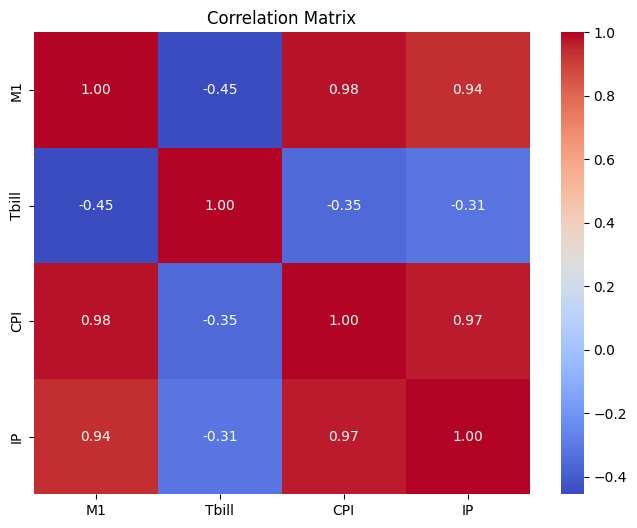

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# prompt: code to create correlation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already loaded
# Replace 'Data 2.xlsx' with the actual filename if different


try:
    df = pd.read_excel('Data 3.xlsx')
except FileNotFoundError:
    print("Error: 'Data 2.xlsx' not found. Please upload the correct file.")
    exit()

required_cols = ['M1', 'Tbill', 'CPI', 'IP']
if not all(col in df.columns for col in required_cols):
    print("Error: The DataFrame does not contain all the required columns ('GDP', 'PCE', 'Inv', 'G'). Please check your excel file.")
    exit()

# Calculate the correlation matrix
correlation_matrix = df[required_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('Correlation_Matrix.jpg', dpi=300)
plt.show()
files.download('Correlation_Matrix.jpg')


In [8]:
# prompt: code to create excel file for correlation and p-value

import pandas as pd
from scipy.stats import pearsonr

try:
    df = pd.read_excel('Data 3.xlsx')
except FileNotFoundError:
    print("Error: 'Data 2.xlsx' not found. Please upload the correct file.")
    exit()

required_cols = ['M1', 'Tbill', 'CPI', 'IP']
if not all(col in df.columns for col in required_cols):
    print("Error: The DataFrame does not contain all the required columns ('GDP', 'PCE', 'Inv', 'G'). Please check your excel file.")
    exit()

# Create an empty dictionary to store correlation and p-value
correlation_results = {}

# Calculate correlation and p-value for each pair of columns
for i in range(len(required_cols)):
    for j in range(i + 1, len(required_cols)):
        col1 = required_cols[i]
        col2 = required_cols[j]
        correlation, p_value = pearsonr(df[col1], df[col2])
        correlation_results[(col1, col2)] = {'Correlation': correlation, 'P-value': p_value}

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index')

# Save the correlation and p-value data to an Excel file
correlation_df.to_excel('correlation_pvalue.xlsx')

from google.colab import files
files.download('correlation_pvalue.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

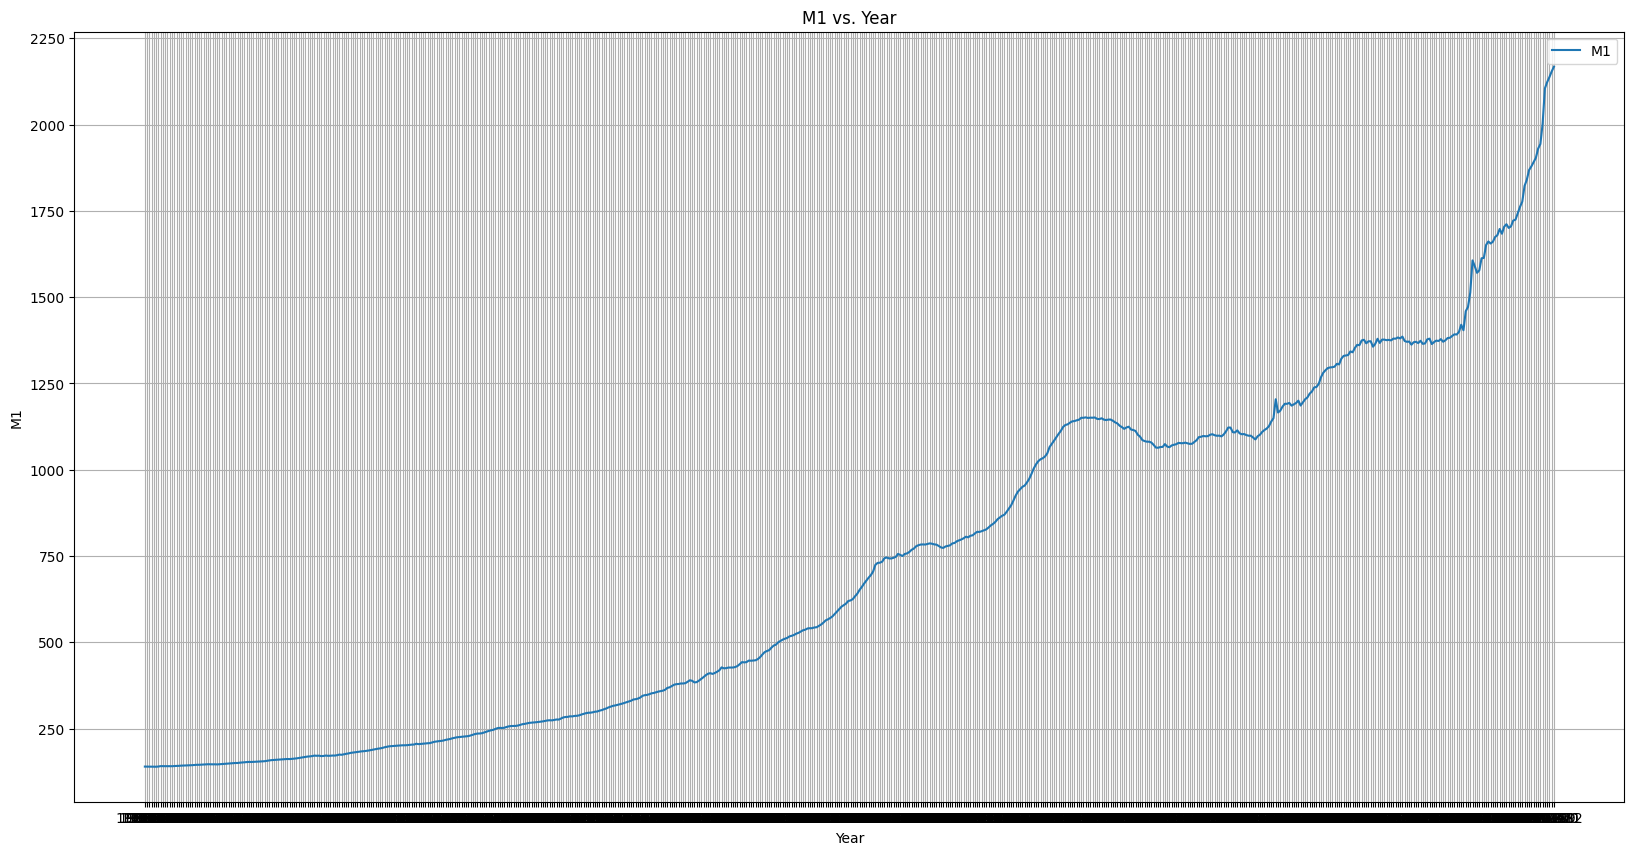

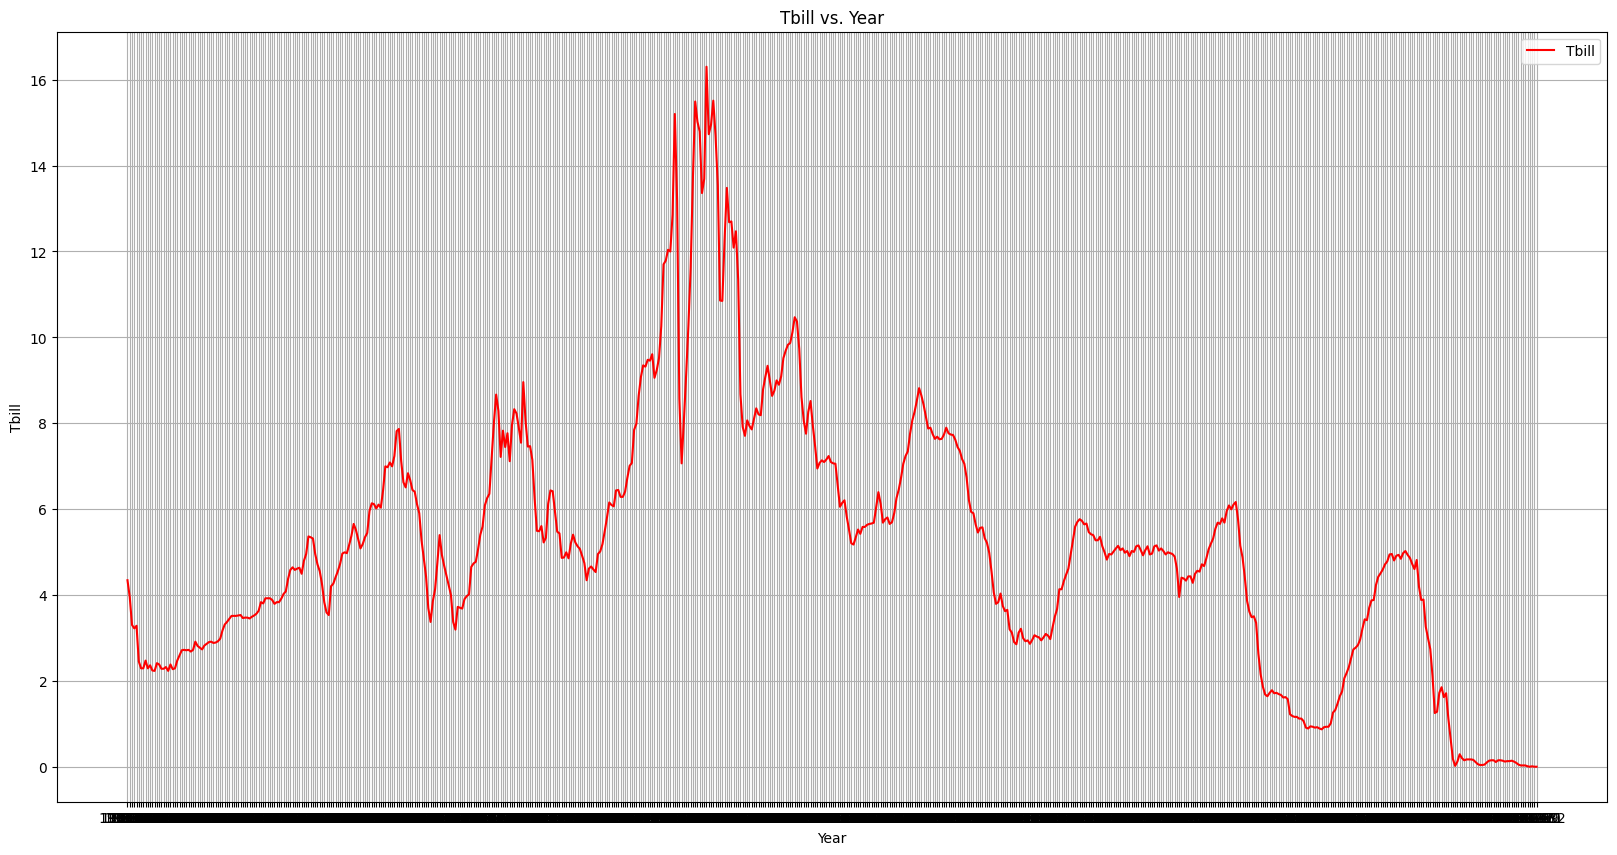

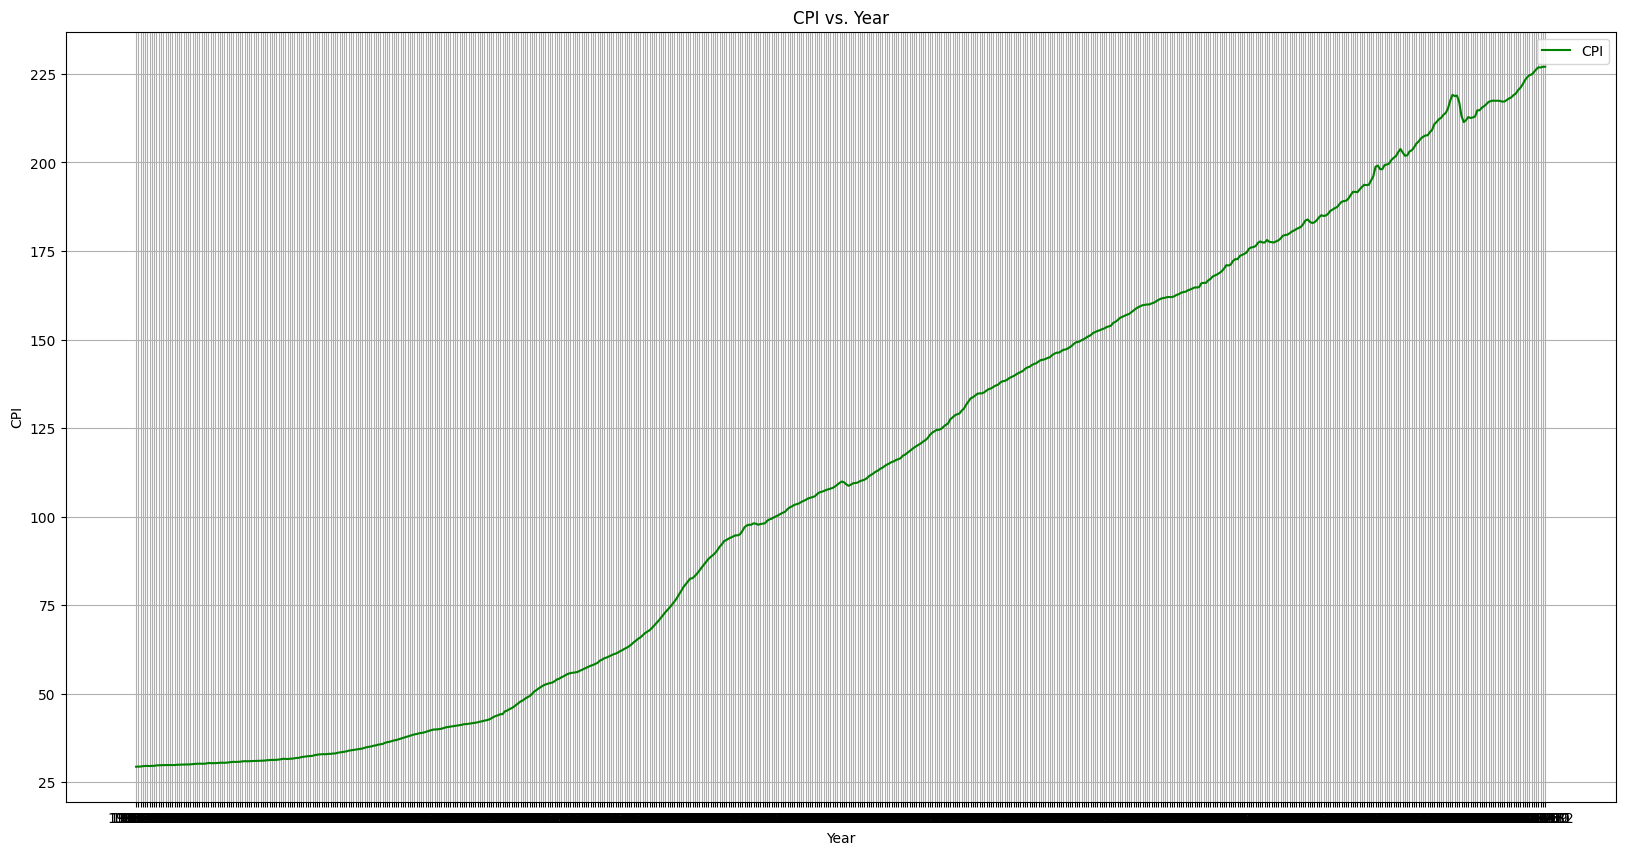

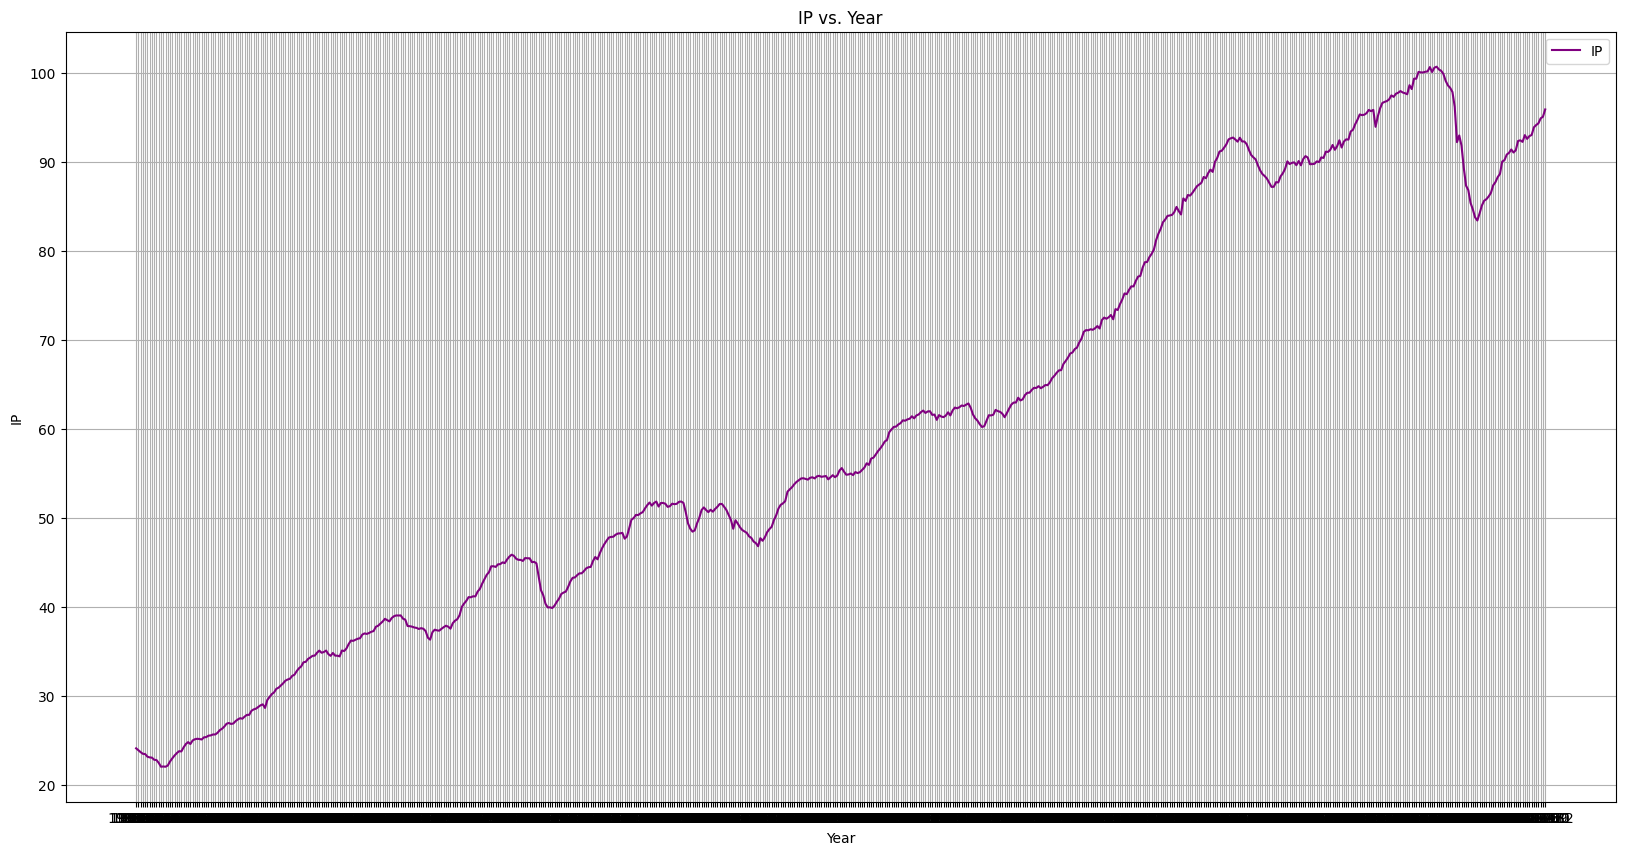

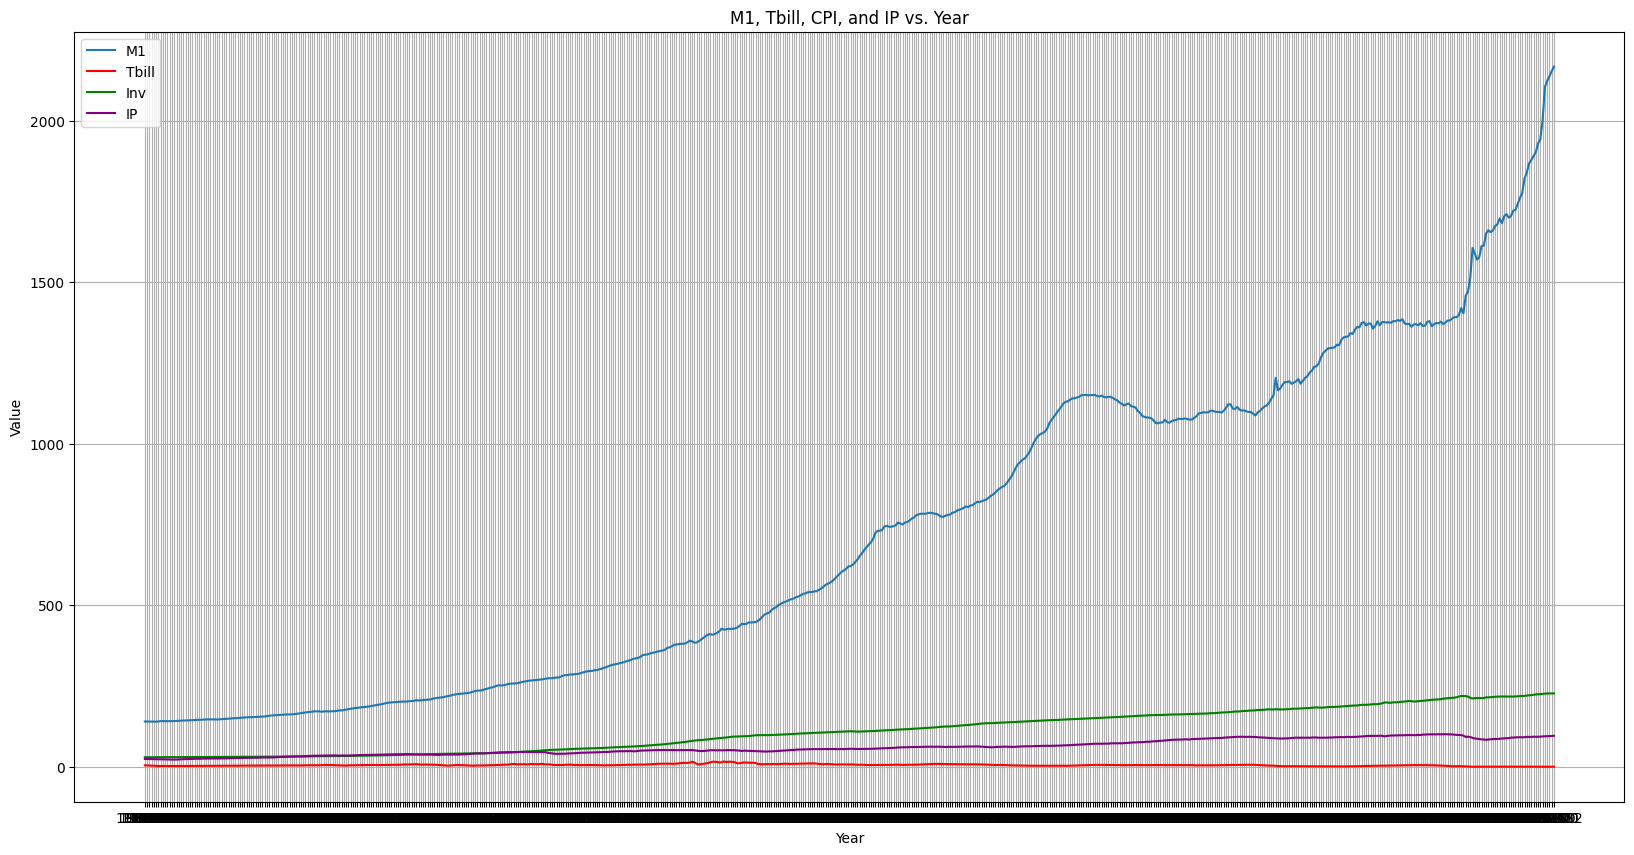

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# prompt: code to download all the above graph in jpg format in 300dpi

import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Save the individual line graphs as JPG files with 300 DPI
plt.figure(figsize=(20, 10))
plt.plot(df['Year'], df['M1'], label='M1')
plt.xlabel('Year')
plt.ylabel('M1')
plt.title('M1 vs. Year')
plt.legend()
plt.grid(True)
plt.savefig('M1_plot.jpg', dpi=300) #saving M1 plot
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(df['Year'], df['Tbill'], label='Tbill', color='red')
plt.xlabel('Year')
plt.ylabel('Tbill')
plt.title('Tbill vs. Year')
plt.legend()
plt.grid(True)
plt.savefig('Tbill_plot.jpg', dpi=300) #saving Tbill plot
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(df['Year'], df['CPI'], label='CPI', color='green')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI vs. Year')
plt.legend()
plt.grid(True)
plt.savefig('CPI_plot.jpg', dpi=300) #saving CPI plot
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(df['Year'], df['IP'], label='IP', color='purple')
plt.xlabel('Year')
plt.ylabel('IP')
plt.title('IP vs. Year')
plt.legend()
plt.grid(True)
plt.savefig('IP_plot.jpg', dpi=300) #saving IP plot
plt.show()


# ... (rest of your existing code) ...

plt.figure(figsize=(20, 10))
plt.plot(df['Year'], df['M1'], label='M1')
plt.plot(df['Year'], df['Tbill'], label='Tbill', color='red')
plt.plot(df['Year'], df['CPI'], label='Inv', color='green')
plt.plot(df['Year'], df['IP'], label='IP', color='purple')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('M1, Tbill, CPI, and IP vs. Year')
plt.legend()
plt.grid(True)
plt.savefig('combined_plot.jpg', dpi=300) #saving combined plot
plt.show()


from google.colab import files
files.download('M1_plot.jpg')
files.download('Tbill_plot.jpg')
files.download('CPI_plot.jpg')
files.download('IP_plot.jpg')
files.download('combined_plot.jpg')

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the excel file
try:
    df = pd.read_excel('Data 3.xlsx')  # Replace 'Data 3.xlsx' with the correct filename
except FileNotFoundError:
    print("Error: 'Data 3.xlsx' not found. Please upload the correct file.")
    exit()

# ... (Your existing code to create and save the plot) ...

# Save the individual line graphs as JPG files with 300 DPI
plt.figure(figsize=(624, 100))
plt.plot(df['Year'], df['M1'], label='M1')  # 'df' is now defined and can be used
plt.xlabel('Year')
plt.ylabel('M1')
plt.title('M1 vs. Year')
plt.legend()
plt.grid(True)

plt.show()
